In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt


# Exercise 1
### (b) 
Come up with a general formula to calculate and/or code
a simulation for the probability that c doctors with competence p
make the correct decision by majority voting. Use it to calculate the
probability of a correct decision for the group of medical students.

### Condorcet's Jury Theorem:

$P(N,p) = \sum_{k = \frac{N}{2}}^{N} \binom{N}{k}\cdot p^k \cdot (1-p)^{N-k}$, where the probability of the right choice is $p$ and $N$ is the number of voters. Additonially, we assume that $k>2$ and that $k$ is odd to avoid ties. The theorem states if the voters are independent and the probability of voting for the correct choice for each voter is $p>0.5$, then the probability of the majority vote for the correct choice is larger than $p$ and converges to one as the population $N$ goes to infinity.

In [23]:
c = 19
p = 0.6

def PcorrectMajority(c,p):
    q = 0.0
    for k in range(math.ceil(c/2),c+1):
        q = q + (comb(c, k, exact=False) * (p**k) * (1-p)**(c-k))
    return q

print("p(19,0.6) = ", PcorrectMajority(c,p))

p(19,0.6) =  0.8139079785845882


### (c) 
Make a graph of the probability of a correct decision for
various sizes of the jury and different competence levels (p) of the
individual doctors.

In [3]:
def createProbMatrix(Cs, Ps):
    graph = np.empty([len(Cs), len(Ps)])
    for i in range(0,len(Cs)):
        for j in range(0,len(Ps)):
            graph[i][j] = PcorrectMajority(Cs[i], Ps[j])
    return graph

In [4]:
def plotHeatmap(x, y, xy):
    fig, ax = plt.subplots()
    im = ax.imshow(xy, aspect='auto')

    # Set ticks
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    
    # label them 
    ax.set_xticklabels(list(map('{:.2f}'.format,x)))
    ax.set_yticklabels(y)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    
    ax.set_xticks(np.arange(xy.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(xy.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
        
    # Create text annotations
    for i in range(len(y)):
        for j in range(len(x)):
            text = ax.text(j, i, "{:.2f}".format(xy[i, j]),
                           ha="center", va="center", color="w")

    ax.set_title("Probabilities of a correct decisions")
    ax.set_xlabel("Competence level p")
    ax.set_ylabel("Jury size c")
    fig.tight_layout()
    # plt.savefig('heatmapEx1c.png')
    plt.show()

In [5]:
def heatmapCorrectDecision(minC, maxC, stepC, minP, maxP, stepP):
    Cs = range(minC, maxC + stepC , stepC)
    Ps = np.arange(minP, maxP + stepP, stepP)
    graph = createProbMatrix(Cs, Ps)
    plotHeatmap(Ps, Cs, graph)

In [18]:
def graphSizeCorrectDecision(minC, maxC, stepC, p, hlineY = None):
    Cs = range(minC, maxC + stepC, stepC)
    probs = np.empty([len(Cs), 1])
    for i in range(0,len(Cs)):
            probs[i] = PcorrectMajority(Cs[i], p)
    plt.plot(Cs, probs)
    plt.xlabel('Jury size c')
    plt.xticks(Cs)
    plt.ylabel('Competence level p')
    plt.title("Probabilities of a correct decisions with varying c")
    if hlineY is not None:
        plt.axhline(y=hlineY, color='r', linestyle='-')
    # plt.savefig('ex1d.png')
    plt.show()
    
def graphCompetenceCorrectDecision(minP, maxP, stepP, c):
    Ps = np.arange(minP, maxP + stepP, stepP)
    probs = np.empty([len(Ps), 1])
    for i in range(0,len(Ps)):
            probs[i] = PcorrectMajority(c, Ps[i])
    plt.plot(Ps, probs)
    plt.xlabel('Competence level p')
    plt.ylabel('Jury size c')
    plt.title("Probabilities of a correct decisions with varying p")
    # plt.savefig('ex1d.png')
    plt.show()

Creating multiple graphs with varying jury size and competence levels

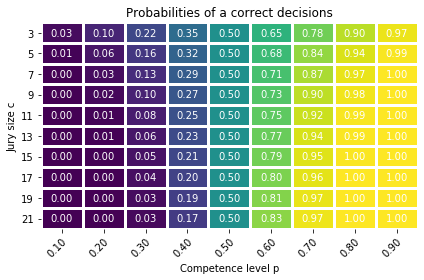

In [14]:
heatmapCorrectDecision(3, 21, 2, 0.1, 0.9, 0.1)

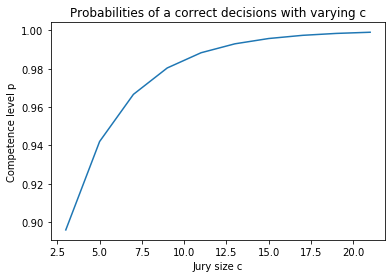

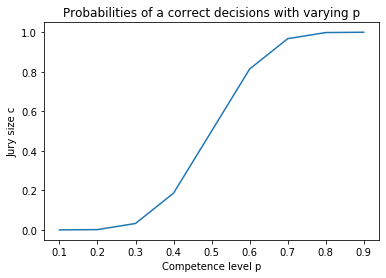

In [8]:
graphSizeCorrectDecision(3, 21, 2, 0.8)
graphCompetenceCorrectDecision(0.1, 0.9, 0.1, 19)

### (d)
Who has the highest chance to make the correct decision:
the radiologist, the group of doctors or the group of students? How
big does the group of medical students need to be to make the probability
of a correct decision (almost) equal to the prediction of the
group of doctors?

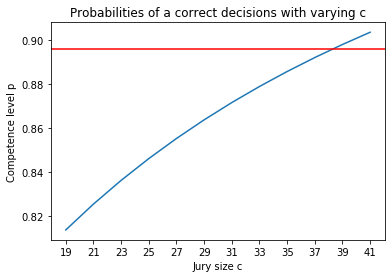

In [17]:
graphSizeCorrectDecision(19, 41, 2, 0.6, PcorrectMajority(3, 0.8))